In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [83]:
import pandas as pd
heart_ds = pd.read_csv('heart-disease.csv')
heart_ds.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:


import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('heart-disease.csv')
train, test = train_test_split(df, test_size=0.2, random_state=0)
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [84]:
test_data= pd.read_csv('test.csv')
x_test=test_data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y_test= test_data[['target']]

In [85]:
x_test.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,70,1,0,145,174,0,1,125,1,2.6,0,0,3
1,64,1,3,170,227,0,0,155,0,0.6,1,0,3
2,59,1,3,170,288,0,0,159,0,0.2,1,0,3
3,60,1,0,125,258,0,0,141,1,2.8,1,1,3
4,62,1,2,130,231,0,1,146,0,1.8,1,3,3


In [86]:
y_test.head()

,target
0,0
1,1
2,0
3,0
4,1


In [87]:
train_data= pd.read_csv('train.csv')
x_train= train_data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y_train= train_data[['target']]

train_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,43,0,2,122,213,0,1,165,0,0.2,1,0,2,1
1,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
2,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
3,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
4,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0


In [88]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,43,0,2,122,213,0,1,165,0,0.2,1,0,2
1,66,0,2,146,278,0,0,152,0,0.0,1,1,2
2,58,1,2,140,211,1,0,165,0,0.0,2,0,2
3,63,0,0,124,197,0,1,136,1,0.0,1,0,2
4,57,1,1,154,232,0,0,164,0,0.0,2,1,2


In [89]:
y_train.head()

,target
0,1
1,1
2,1
3,0
4,0


In [90]:
train_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [91]:
train_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.00000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.851240,0.673554,0.966942,131.805785,246.760331,0.14876,0.520661,149.826446,0.334711,1.063223,1.409091,0.727273,2.289256,0.541322
std,8.944421,0.469885,1.050065,17.114924,53.471911,0.35659,0.532732,23.169116,0.472867,1.193764,0.619530,1.030651,0.623709,0.499322
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,209.250000,0.00000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.00000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,277.750000,0.00000,1.000000,166.000000,1.000000,1.750000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [96]:
#1.How many people have heart disease and how many people doesn't have hreart disease?
#2.People of which sex has most heart disease?
#3. People of which has which type of chest pain most?
#4. People of which chest pain are most pron to have heart disease?
#5. Age vs Maximum heart rate when people have heart disease?
#6. Age vs Maximum heart rate when people doesn't have heart disease?
#7. Age vs serum cholestoral when people have heart disease?
#8. Age vs serum cholestoral when people doesn't have heart disease?
#9. People of which sex has more exercise induced angina?



In [92]:
#ques 1:How many people have heart disease and how many people doesn't have hreart disease?
train_data.target.value_counts()

target
1    131
0    111
Name: count, dtype: int64

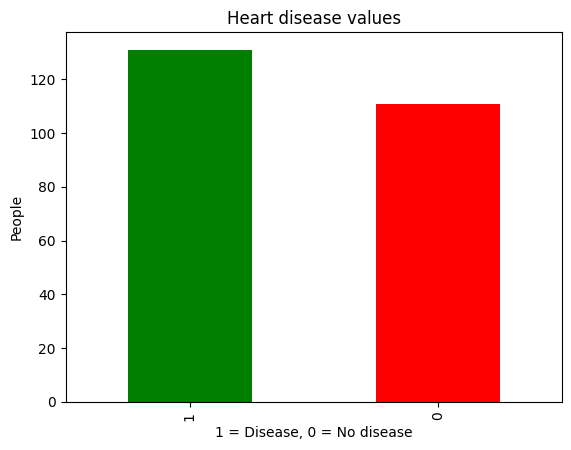

In [14]:

import matplotlib.pyplot as plt
train_data.target.value_counts().plot(kind = 'bar', color = ['green', 'red'])
plt.title("Heart disease values")
plt.xlabel("1 = Disease, 0 = No disease")
plt.ylabel("People");

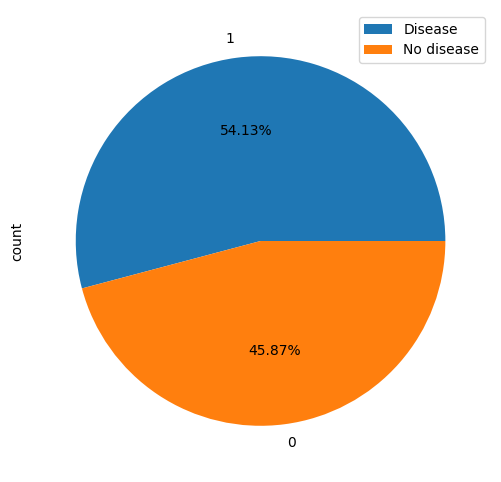

In [15]:
train_data.target.value_counts().plot(kind = 'pie', figsize = (10,6),autopct = '%1.2f%%')
plt.legend(["Disease", "No disease"]);

In [16]:
#ques 2.People of which sex has most heart disease?

train_data.sex.value_counts()

sex
1    163
0     79
Name: count, dtype: int64

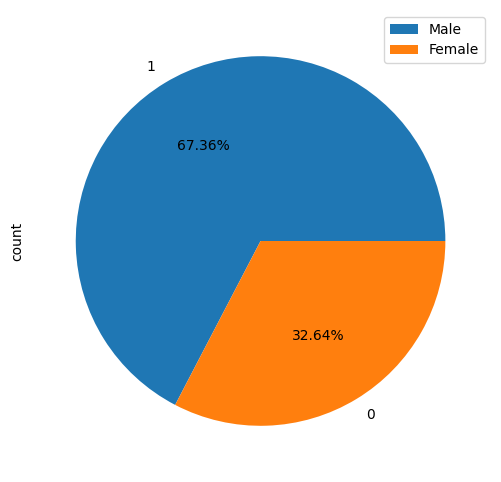

In [17]:
train_data.sex.value_counts().plot(kind = 'pie', figsize = (10,6),autopct = '%1.2f%%')
plt.legend(['Male', 'Female'])

In [18]:
pd.crosstab(train_data.sex, train_data.target)

target,0,1
sex,,
0,18,61
1,93,70


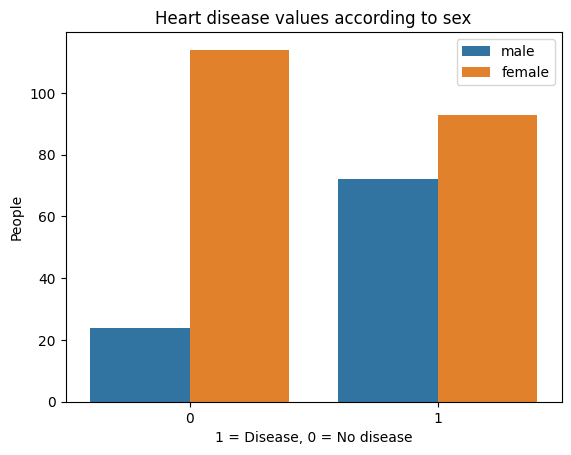

In [19]:

import seaborn as sns
sns.countplot(x = 'target', data = df, hue = 'sex');
plt.title("Heart disease values according to sex")
plt.xlabel("1 = Disease, 0 = No disease")
plt.ylabel("People");
plt.legend(['male', 'female']);


In [20]:
#ques 3. People of which has which type of chest pain most?

train_data.cp.value_counts()

cp
0    117
2     69
1     36
3     20
Name: count, dtype: int64

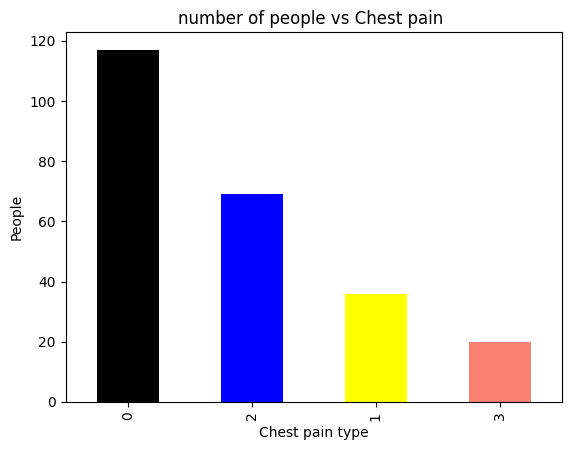

In [21]:
train_data.cp.value_counts().plot(kind = 'bar', color = ['black','blue','yellow','salmon'])
plt.title("number of people vs Chest pain ");
plt.xlabel("Chest pain type")
plt.ylabel("People");

In [22]:
pd.crosstab(train_data.sex, train_data.cp)

cp,0,1,2,3
sex,,,,
0,32,14,29,4
1,85,22,40,16


Text(0, 0.5, 'People')

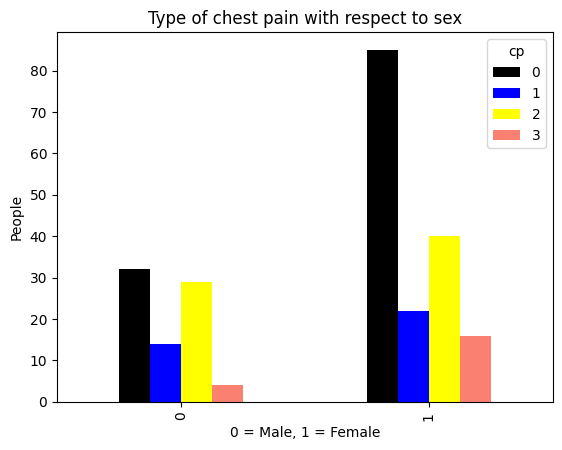

In [23]:
pd.crosstab(train_data.sex, train_data.cp).plot(kind = 'bar', color = ['black','blue','yellow','salmon'])
plt.title("Type of chest pain with respect to sex")
plt.xlabel('0 = Male, 1 = Female');
plt.ylabel("People")

In [24]:
#ques 4 People of which chest pain are most pron to have heart disease?
pd.crosstab(train_data.cp, train_data.target)

target,0,1
cp,,
0,84,33
1,7,29
2,14,55
3,6,14


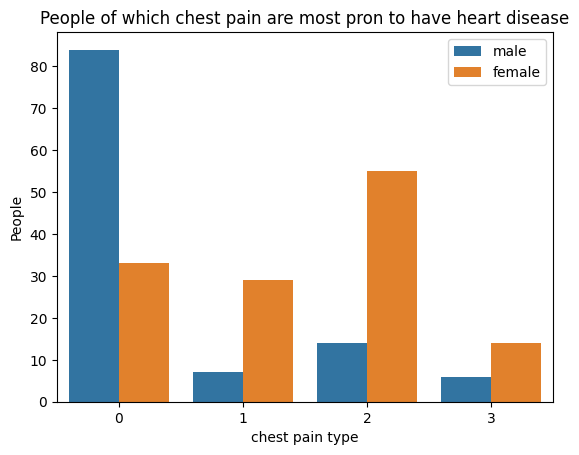

In [25]:
sns.countplot(x = 'cp', data = train_data, hue = 'target');
plt.title("People of which chest pain are most pron to have heart disease")
plt.xlabel('chest pain type');
plt.ylabel("People")
plt.legend(['male', 'female']);

Text(13.819444444444445, 0.5, 'People')

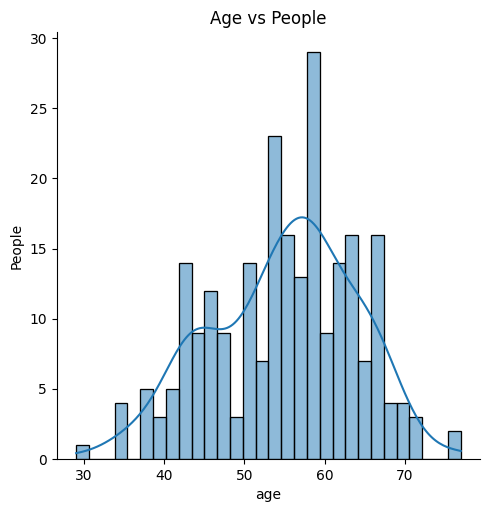

In [26]:
#ques 5. Age vs Maximum heart rate when people have heart disease? &
#ques 6. Age vs Maximum heart rate when people doesn't have heart disease?

sns.displot(x = 'age', data = train_data, bins = 30, kde = True );
plt.title("Age vs People")
plt.ylabel("People")

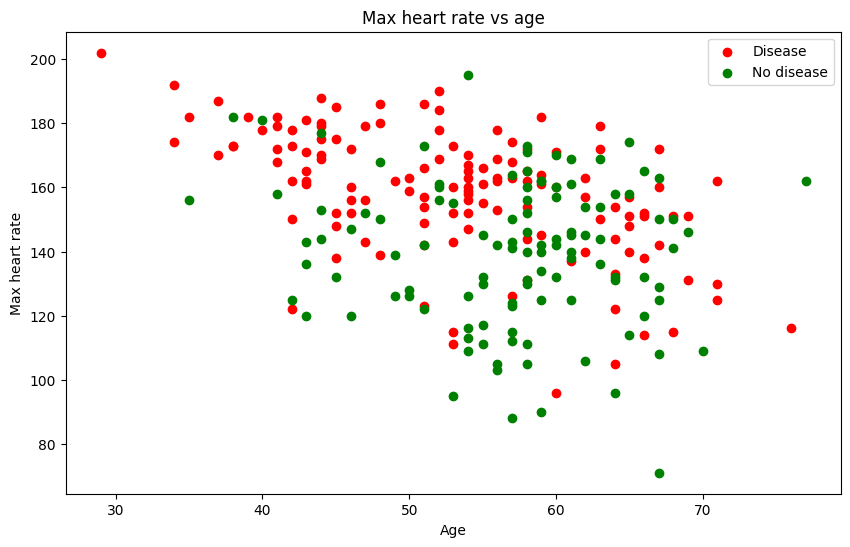

In [27]:
plt.figure(figsize = (10,6))
#for disease

plt.scatter(train_data.age[train_data.target == 1],
            train_data.thalach[train_data.target == 1],
            c = 'red'
           )

#for no disease

plt.scatter(train_data.age[train_data.target == 0],
            train_data.thalach[train_data.target == 0],
            c = 'green'
           )

plt.title("Max heart rate vs age")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(['Disease', 'No disease']);

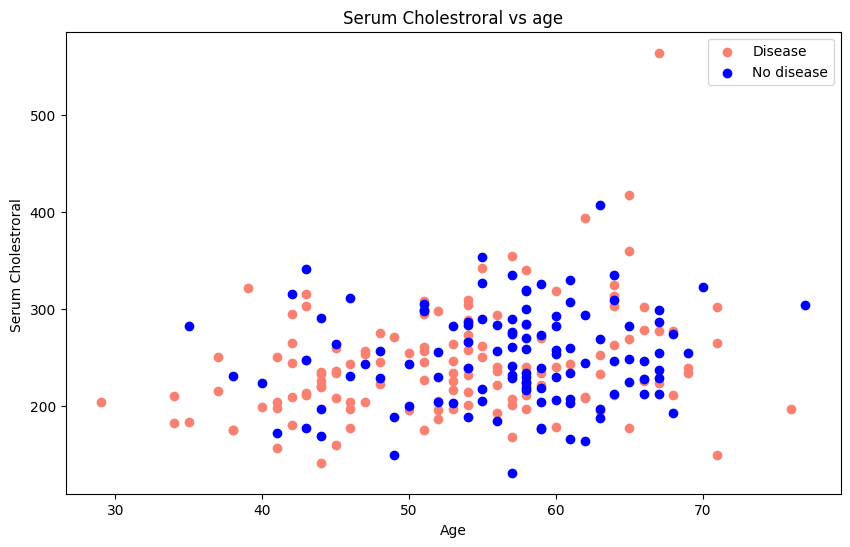

In [28]:
#7. Age vs serum cholestoral when people have heart disease?
#8. Age vs serum cholestoral when people doesn't have heart disease?

plt.figure(figsize = (10,6))
#for disease

plt.scatter(train_data.age[train_data.target == 1],
            train_data.chol[train_data.target == 1],
            c = 'salmon'
           )

#for no disease

plt.scatter(train_data.age[train_data.target == 0],
            train_data.chol[train_data.target == 0],
            c = 'blue'
           )

plt.title("Serum Cholestroral vs age")
plt.xlabel("Age")
plt.ylabel("Serum Cholestroral ")
plt.legend(['Disease', 'No disease']);



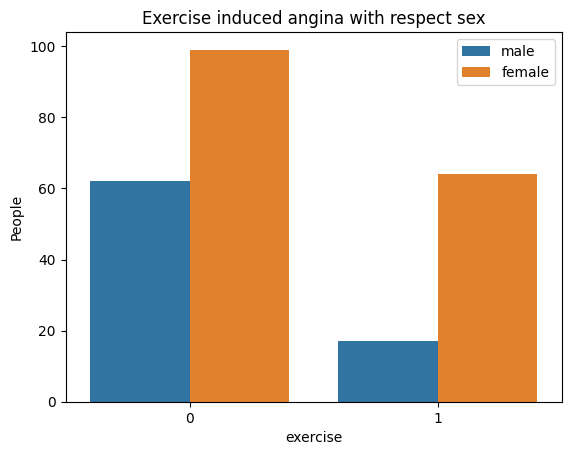

In [29]:
#9. People of which sex has more exercise induced angina?

sns.countplot(x = 'exang', data = train_data, hue = 'sex' )
plt.title("Exercise induced angina with respect sex");
plt.xlabel('exercise');
plt.ylabel("People")
plt.legend(['male', 'female']);

In [93]:
#Random forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



ml = RandomForestClassifier()
ml = ml.fit(x_train,y_train.values.ravel())
prediction = ml .predict(x_test)
prediction



array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [94]:
 # Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

# Print the calculated scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8688524590163934
Precision: 0.8823529411764706
Recall: 0.8823529411764706
F1-score: 0.8823529411764706


confusion matrix :
[[23  4]
 [ 5 29]]


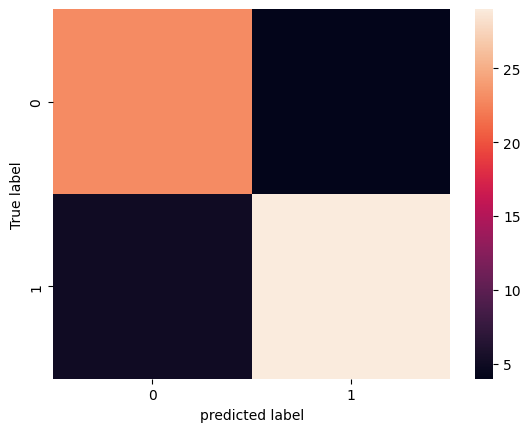

In [65]:
#Confusion Matrix for Random forest Classifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction, labels =[0,1],)
print("confusion matrix :")
print(cm)

#heat map
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm)
plt.xlabel('predicted label');
plt.ylabel("True label")
plt.show()

In [35]:
#Decision Tree Classification

In [66]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = tree.DecisionTreeClassifier()
model = model.fit(x_train,y_train)
prediction2 = model.predict(x_test)

In [67]:
prediction2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [69]:
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, prediction2)
precision = precision_score(y_test, prediction2)
recall = recall_score(y_test, prediction2)
f1 = f1_score(y_test, prediction2)

# Print the calculated scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7704918032786885
Precision: 0.8333333333333334
Recall: 0.7352941176470589
F1-score: 0.78125


confusion matrix :
[[22  5]
 [ 9 25]]


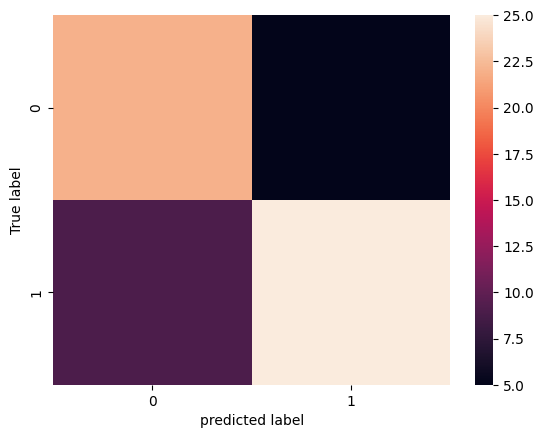

In [70]:
#Confusion Matrix for decision tree
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction2, labels =[0,1])
print("confusion matrix :")
print(cm)

#heat map
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm)
plt.xlabel('predicted label');
plt.ylabel("True label")
plt.show()

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


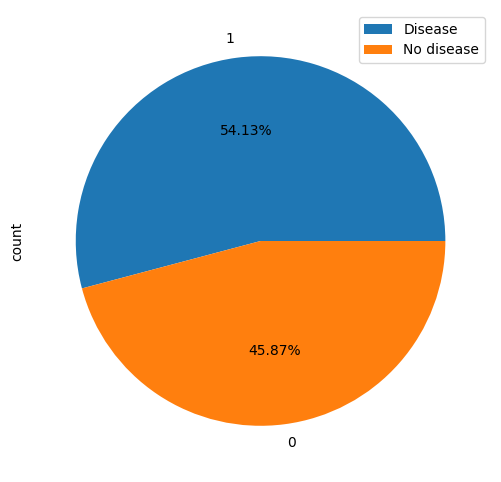

In [71]:
import numpy as np
arr = np.array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])
print(arr.reshape(-1).base)

train_data.target.value_counts().plot(kind = 'pie', figsize = (10,6),autopct = '%1.2f%%')
plt.legend(["Disease", "No disease"]);

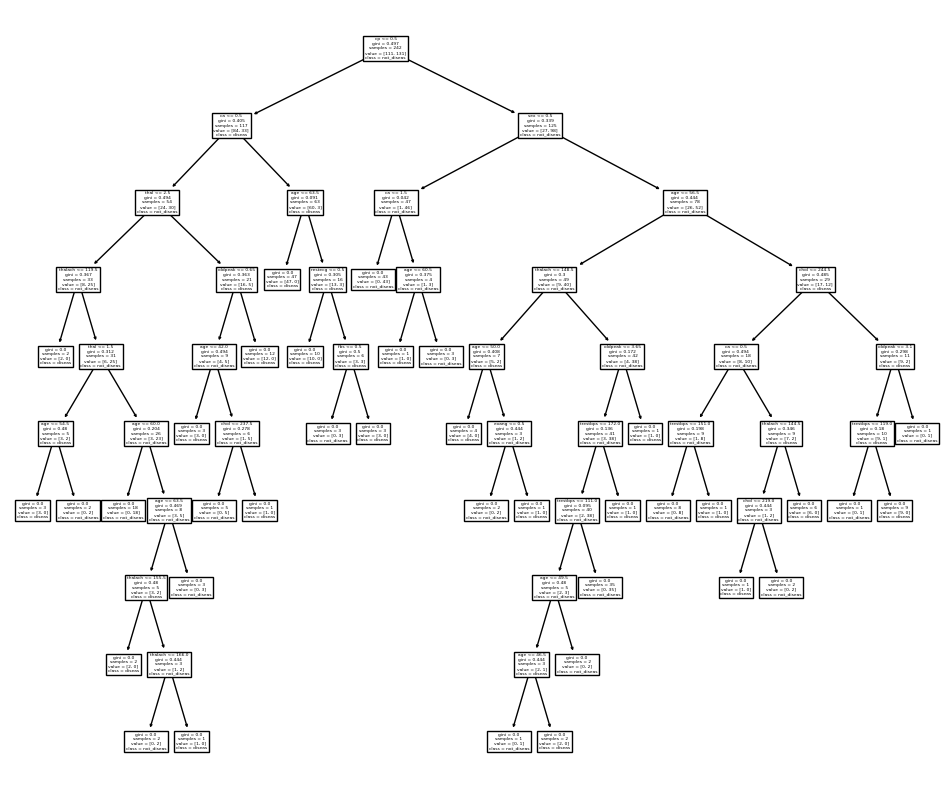

In [72]:
from sklearn.preprocessing import LabelEncoder
fig = plt.figure(figsize = (12,10))
tree.plot_tree(model,feature_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'],class_names=['diseas','not_diseas'])
plt.show()

In [95]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model1.fit(x_train,y_train.values.ravel())


LogisticRegression(max_iter=1000)

In [73]:
prediction3 = model1.predict(x_test)
prediction3

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [74]:
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, prediction3)
precision = precision_score(y_test, prediction3)
recall = recall_score(y_test, prediction3)
f1 = f1_score(y_test, prediction3)

# Print the calculated scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8524590163934426
Precision: 0.8378378378378378
Recall: 0.9117647058823529
F1-score: 0.8732394366197184


[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


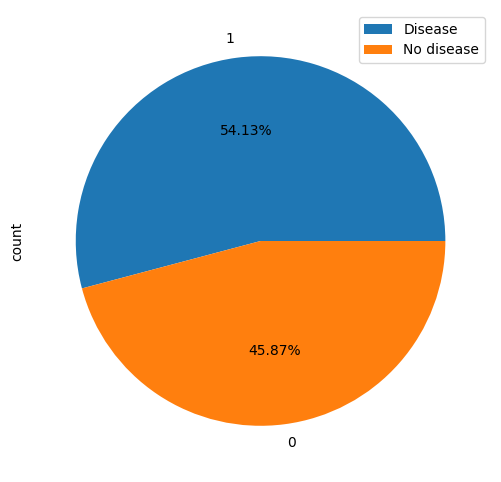

In [75]:
import numpy as np
arr = np.array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])
print(arr.reshape(-1).base)

train_data.target.value_counts().plot(kind = 'pie', figsize = (10,6),autopct = '%1.2f%%')
plt.legend(["Disease", "No disease"]);

confusion matrix :
[[23  4]
 [ 5 29]]


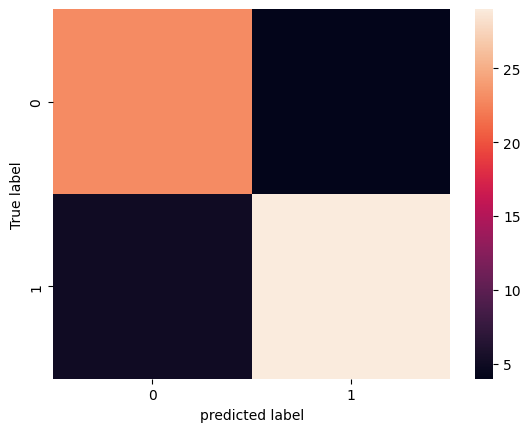

In [76]:
#Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction, labels =[0,1])
print("confusion matrix :")
print(cm)

#heat map
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm)
plt.xlabel('predicted label');
plt.ylabel("True label")
plt.show()

In [47]:
#Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model3 = GaussianNB()
model3.fit(x_train,y_train.values.ravel())



GaussianNB()

In [78]:
prediction4 = model3.predict(x_test)
prediction4

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [79]:
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, prediction4)
precision = precision_score(y_test, prediction4)
recall = recall_score(y_test, prediction4)
f1 = f1_score(y_test, prediction4)

# Print the calculated scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8524590163934426
Precision: 0.8378378378378378
Recall: 0.9117647058823529
F1-score: 0.8732394366197184


confusion matrix :
[[21  6]
 [ 3 31]]


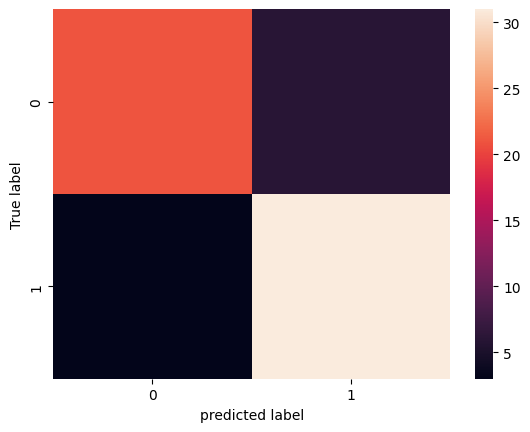

In [80]:
#Confusion Matrix for Naive Bayes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction3, labels =[0,1])
print("confusion matrix :")
print(cm)

#heat map
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm)
plt.xlabel('predicted label');
plt.ylabel("True label")
plt.show()